<a href="https://colab.research.google.com/github/KavindaRajapaksha/Brain-Tumor-Detection2024/blob/main/BrainTumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [2]:
import numpy as np
import torch
from torch.utils.data import Dataset,DataLoader
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


dataset link :[link text](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection)

Reading the images

In [4]:
tumor=[]
path ='/content/drive/MyDrive/dataset/data/brain_tumor_dataset/yes/*.jpg'
for f in glob.iglob(path):
  img=cv2.imread(f)
  img=cv2.resize(img,(128,128))
  b,g,r =cv2.split(img)
  img=cv2.merge([r,g,b])
  tumor.append(img)



In [5]:
healthy=[]
path ='/content/drive/MyDrive/dataset/data/brain_tumor_dataset/no/*.jpg'
for f in glob.iglob(path):
  img=cv2.imread(f)
  img=cv2.resize(img,(128,128))
  b,g,r =cv2.split(img)
  img=cv2.merge([r,g,b])
  healthy.append(img)


In [6]:
len(healthy)

85

In [7]:
healthy=np.array(healthy)
tumor=np.array(tumor)
All=np.concatenate((healthy,tumor))

In [8]:
All.shape

(171, 128, 128, 3)

In [9]:
healthy.shape

(85, 128, 128, 3)

In [10]:
tumor.shape

(86, 128, 128, 3)

In [11]:
np.random.choice(5,3)

array([4, 1, 1])

Visualize Brain MRI Images

In [12]:
def plot_random(healthy,tumor,num=5):
  healthy_imgs=healthy[np.random.choice(healthy.shape[0],num,replace=False)]
  tumor_imgs=tumor[np.random.choice(tumor.shape[0],num,replace=False)]
  plt.figure(figsize=(8,6))
  for i in range(num):
    plt.subplot(1,num,i+1)
    plt.title('healthy')
    plt.imshow(healthy_imgs[i])

    plt.figure(figsize=(8,6))
  for i in range(num):
    plt.subplot(1,num,i+1)
    plt.title('tumor')
    plt.imshow(tumor_imgs[i])

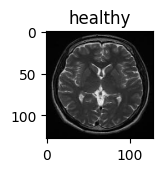

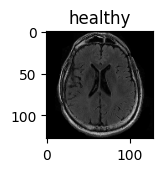

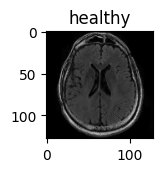

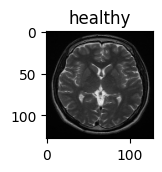

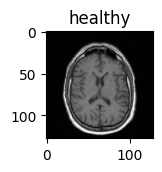

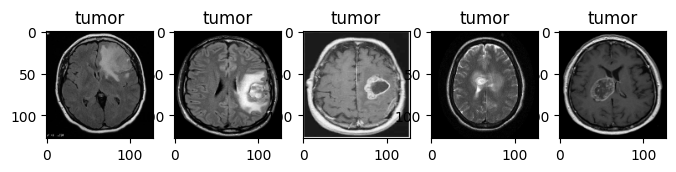

In [15]:
plot_random(healthy,tumor,num=5)

Create Torch Dataset Class

In [58]:
class Dataset(object):


    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])

Create custom dataset class

In [80]:
import numpy as np
import glob
import cv2
from torch.utils.data import Dataset

class MRI(Dataset):
    def __init__(self):
        tumor=[]
        path = '/content/drive/MyDrive/dataset/data/brain_tumor_dataset/yes/*.jpg'
        for f in glob.iglob(path):
            img = cv2.imread(f)
            img = cv2.resize(img, (128, 128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            tumor.append(img)

        healthy=[]
        path = '/content/drive/MyDrive/dataset/data/brain_tumor_dataset/no/*.jpg'
        for f in glob.iglob(path):
            img = cv2.imread(f)
            img = cv2.resize(img, (128, 128))
            b, g, r = cv2.split(img)
            img = cv2.merge([r, g, b])
            healthy.append(img)

        # Convert lists to numpy arrays
        tumor = np.array(tumor, dtype=np.float32)
        healthy = np.array(healthy, dtype=np.float32)

        # Create labels
        tumor_label = np.ones(tumor.shape[0], dtype=np.float32)
        healthy_label = np.zeros(healthy.shape[0], dtype=np.float32)

        # Concatenate images and labels
        self.images = np.concatenate((tumor, healthy), axis=0)
        self.labels = np.concatenate((tumor_label, healthy_label))

    def __len__(self):
        return self.images.shape[0]

    def __getitem__(self, index):
        sample = {'image': self.images[index], 'label': self.labels[index]}
        return sample

    def normalize(self):
        self.images = self.images / 255.0


In [81]:
mri=MRI()

In [82]:
len(mri)

171

In [83]:
mri[5]

{'image': array([[[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.],
         ...,
         [2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]],
 
        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.],
         ...,
         [2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]],
 
        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.],
         ...,
         [2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.]],
 
        ...,
 
        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.],
         ...,
         [2., 2., 2.],
         [2., 2., 2.],
         [3., 3., 3.]],
 
        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.],
         ...,
         [2., 2., 2.],
         [2., 2., 2.],
         [3., 3., 3.]],
 
        [[2., 2., 2.],
         [2., 2., 2.],
         [2., 2., 2.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [2., 2., 2.]]], dtype=float32),
 'label': 1.0}

In [84]:
mri_dataset = MRI()
mri_dataset.normalize()